# What is Time Series?


- Sequentially ordered data over time.
- Every year, month, day, hour, second
- Daily
- Monthly
- Yearly
- Quarterly

## Aim:
- To estimate how the sequesnce of observations will contiue in the future.

## Assumption:
- Past behavior will continue in the future
- Stationary


## Example
- monthly sales data
- annual quaterly revanue of the organization
- weather data
- sensors feed


## Key Components:
- Trend: How the time series varies over an interval.
- Seasonality: How Time series repeats over a period of time. 
- Irreguarity: irregular components
- cyclical : fluctuation in the data
- stationary: the series does not depends on time (constant over the time.)

## Analysis:


In [1]:
#1. Loading the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#2 import dataset
df = pd.read_csv('F:\Skillenable\Data frames\Beijing_AirQuality.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
df.shape

(35064, 18)

In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

### data description:
- 1. 'year': Years of the data
- 2. 'month': month of the data
- 3. 'day': day of the data 
- 4. 'hour': hour of the data
- 5. 'PM2.5': concentration of PM2.5 (partical per million)
- 6. 'PM10': concentration of PM10 (partical per million)
- 7. 'SO2': concentration of SO2 (partical per million) 
- 8. 'NO2': concentration of No2 (partical per million)
- 9. 'CO': concentration of CO2 (partical per million) 
- 10. 'O3': concentration of O3 (partical per million) 
- 11. 'TEMP': Tempreture
- 12. 'PRES': Pressure
- 13. 'DEWP': Dew point tempreture
- 14. 'RAIN': Reainfall (precipitation) 
- 15. 'wd': wind direction
- 16. 'WSPM': wind speed
- 17. 'station': name of the air quality monitiring site


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


## Conbining the data to time series


In [9]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H') ## strptime converts the string to date time

In [12]:
aq_df = pd.read_csv('F:\Skillenable\Data frames\Beijing_AirQuality.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser= convert_to_date, keep_date_col= False)

In [14]:
aq_df.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [17]:
    aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   PM2.5                34285 non-null  float64       
 3   PM10                 34408 non-null  float64       
 4   SO2                  34334 non-null  float64       
 5   NO2                  33830 non-null  float64       
 6   CO                   33052 non-null  float64       
 7   O3                   33850 non-null  float64       
 8   TEMP                 35011 non-null  float64       
 9   PRES                 35014 non-null  float64       
 10  DEWP                 35011 non-null  float64       
 11  RAIN                 35013 non-null  float64       
 12  wd                   34924 non-null  object        
 13  WSPM                 35021 non-

In [18]:
### Descriptive statistics
aq_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [19]:
# set index
aq_df.set_index('year_month_day_hour', inplace = True)
aq_df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


## Plotting the timeseries

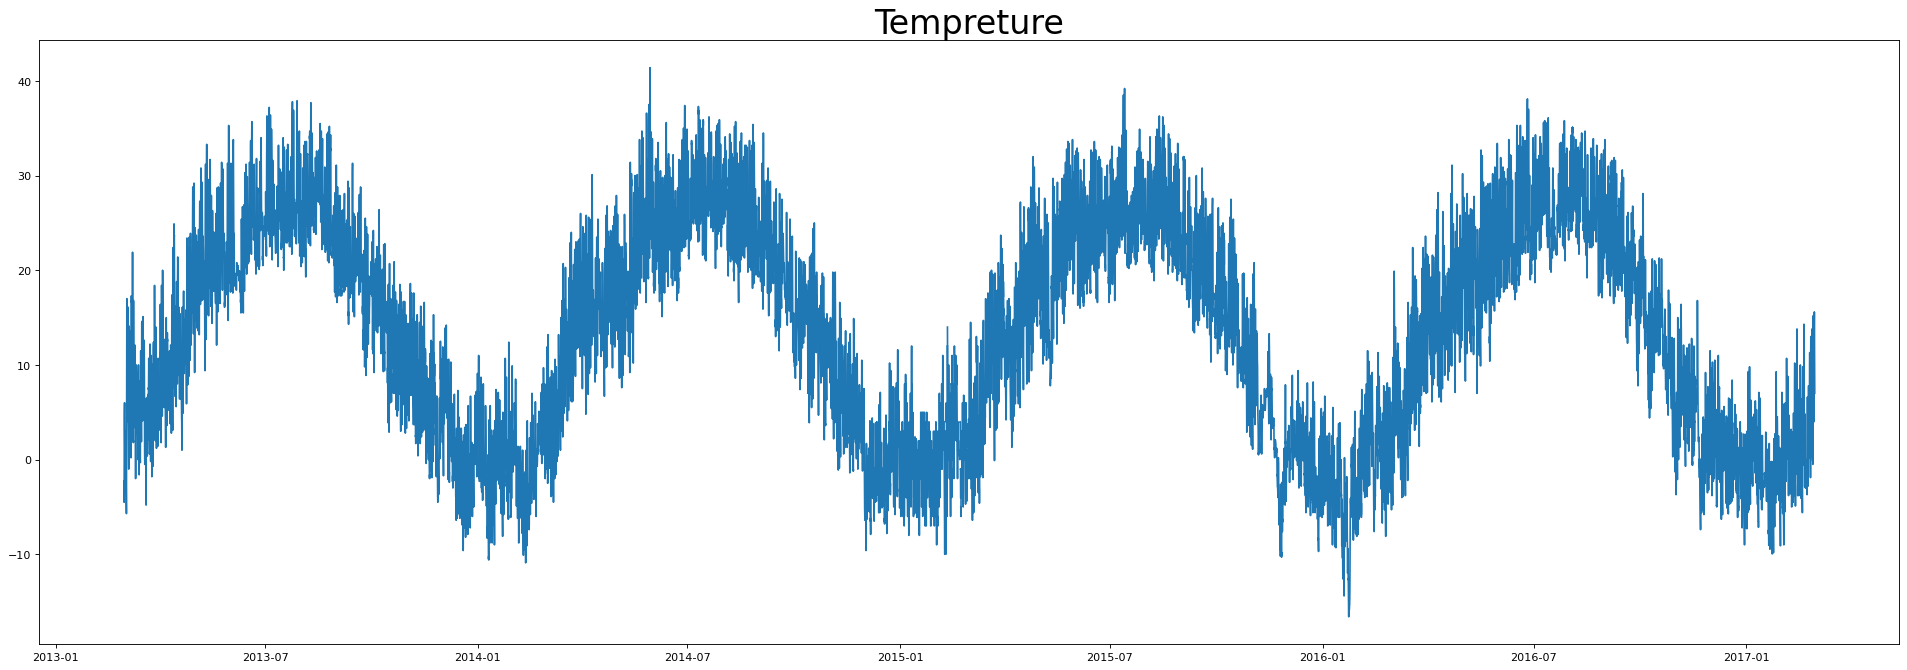

In [20]:
plt.figure(num=None, figsize=(30,10), dpi = 80, facecolor='w', edgecolor='k')
plt.title('Tempreture', fontsize = 30)
plt.plot(aq_df.TEMP)

## Missing values 
- Other than time sereis data: computing the global mean/median and filling it inplace of the missing values 
- In time series data has seasonality and trend, hence taking global mean/median will mess up the information and give up the information and give not accurate result
- ight mess up the modeling process


In [28]:
# check for missing values
print("Rows:", aq_df.shape[0])
print("Columns", aq_df.shape[1])
print("Missing values: \n", aq_df.isnull().any())

Rows: 35064
Columns 14
Missing values: 
 No         False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool


In [29]:
aq_df.isnull().sum()

No            0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [30]:
# we are going to focus on tempreture and PM2.5
     ### Null is an object not a value 
    
aq_df .query('TEMP != TEMP') # As we are comparing the same column null or nan it will bw similar 
# # Gence gives us the missing value

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2015-01-27 20:00:00,16749,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-30 13:00:00,16814,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-31 05:00:00,16830,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 01:00:00,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 11:00:00,16884,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 10:00:00,16931,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 13:00:00,16934,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-07 15:00:00,17008,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-08 14:00:00,17031,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


## handling missing values in case of time series 

In [31]:
## Taking a subset of the entire data where the null values are present:


In [46]:
aq_df['2015-02-21 10':'2015-02-21 23']  ##  10 o'clock to 8 o'clock

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


In [47]:
aq_df_imp = aq_df['2015-02-21 10':'2015-02-21 23'][['TEMP']]
aq_df_imp

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


In [48]:
## Filling null valus 
## Forward fill = Takes previous value and fills for the next value

aq_df_imp['TEMP_ffill'] = aq_df_imp['TEMP'].fillna(method='ffill')
aq_df_imp

,TEMP,TEMP_ffill
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [49]:
## backward fill  - takes the next data and fill it to the previous data
aq_df_imp['TEMP_bfill'] = aq_df_imp['TEMP'].fillna(method= 'bfill')
aq_df_imp

## When we predicting, data will not be accurate in case of last value is null. 

,TEMP,TEMP_ffill,TEMP_bfill
year_month_day_hour,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


#### Rolling window: taking the mean of the previous 2 values and fill in null place

In [51]:
aq_df_imp['TEMP_rolling'] = aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()
aq_df_imp

,TEMP,TEMP_ffill,TEMP_bfill,TEMP_rolling
year_month_day_hour,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.5
2015-02-21 18:00:00,2.0,2.0,2.0,2.5


In [52]:
## In retail industry- The weekend sales are more than the weekday sales
## So we don/t want to take the weekend sales and fill in the weekday
## instead we can take the previous weekday sales and fill this weekday incase its missing.


In [56]:
aq_df.loc[aq_df_imp.index+pd.offsets.DateOffset(years= -1)]['TEMP']


year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
2014-02-21 21:00:00    1.1
2014-02-21 22:00:00    0.7
2014-02-21 23:00:00    0.6
Name: TEMP, dtype: float64

In [57]:
# Joining both dataset
# resetting the index for attaching the dataframes
aq_df_imp = aq_df_imp.reset_index()

In [58]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_ffill,TEMP_bfill,TEMP_rolling
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5


In [59]:
# using Lambda function
# When there is a null value it takes previous years value and when there is no null the data is as it is 


aq_df_imp['TEMP_prevY'] = aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour']- pd.offsets.DateOffset(years = -1)]
                                         ['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis= 1)

In [60]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_ffill,TEMP_bfill,TEMP_rolling,TEMP_prevY
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5,1.0
